# Testbed 1 Hamamatsu image analysis

I used to run this notebook locally on the testbed1 PC, which has since died. it can be run on my personal machine to do csv analysis if I have the csv files. The now irrelevant directories are commmented out. 

The intended way of using this notebook:
    1. copy the directory(s) of the experiment(s) you want to analyze and use that as dir1, etc in the second cell below. 
    2. generate histograms from shots 0,1 for a defined roi to set thresholds for atom loading.
    3. plot the retention and loading
    4. save the result to a csv
    5. reload the csv(s) for nice plotting of several data sets at once

In [7]:
import sys,os
# sys.path.append('..//CsPyController//python')
# datadir = 'D://Experiment_Data//'
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.decomposition import FastICA

# local imports
# import load_images # a module from CsPy for loading images saved by the Hamamatsu
# from simfuncs import soln_to_csv, soln_from_csv # PH's save/load data funcs
 
datadir='trap_array_data'
sys.path.append(os.path.join(sys.path[0],datadir)) # where the csv files live
from simfuncs import soln_to_csv, soln_from_csv

def ica_project(images, components=None, whiten=True):
    """
    Independent component analysis. 
    
    returns:
        A_ica: the mixing matrix
        image_sum: the sum of images projected on the ICA
    """
    X = images.reshape(
        images.shape[0],
        images.shape[1] * images.shape[2]
    ).astype(float)
    
    if components == None:
        components=len(images)
    
    ica = FastICA(n_components=components, max_iter=2000, whiten=whiten)
    ica.fit(X)
    A_ica = ica.components_  # Get estimated mixing matrix
    image_sum = np.sum(np.abs(A_ica),axis=0).reshape(images.shape[1], images.shape[2])
    return A_ica,image_sum

In [6]:
sys.path

['C:\\Users\\prest\\Documents\\Python\\rubidium\\csv_analysis',
 'c:\\python39\\python39.zip',
 'c:\\python39\\DLLs',
 'c:\\python39\\lib',
 'c:\\python39',
 'C:\\Users\\prest\\.virtualenvs\\rubidium-6bgZCrz4',
 '',
 'C:\\Users\\prest\\.virtualenvs\\rubidium-6bgZCrz4\\lib\\site-packages',
 'C:\\Users\\prest\\.virtualenvs\\rubidium-6bgZCrz4\\lib\\site-packages\\win32',
 'C:\\Users\\prest\\.virtualenvs\\rubidium-6bgZCrz4\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\prest\\.virtualenvs\\rubidium-6bgZCrz4\\lib\\site-packages\\Pythonwin',
 '..\\',
 '.\\trap_array_data',
 'C:\\Users\\prest\\Documents\\Python\\rubidium\\csv_analysis\\trap_array_data']

In [73]:
# img = squeeze(load_images.load_images(
#     fname='..//CsPyController//python'+'//results.hdf5'
# ))
# bg = squeeze(load_images.load_images(
#     fname='..//CsPyController//python'+'//background.hdf5'
# ))

dir1 = r'D:\Experiment_Data\2022_01_31'
# dir2 = '2022_01_31_15_14_54_trap_TA_lifetime_measurement_t_EMCCD_gap_2000_to_4000ms'
dir2 = '2022_01_31_12_52_58_trap_TA_lifetime_measurement_t_EMCCD_gap_2000_to_4000ms' # actually 50 ms to 3500 ms
fpath = os.path.join(dir1,dir2,'results.hdf5')

img = squeeze(load_images.load_images(
    fname=fpath
))

if len(img.shape) == 5:
    iters = img.shape[0] # iterations in the experiment
    meas = img.shape[1] # measurements per iteration
elif len(img.shape) == 4:
    iters = 1
    meas = img.shape[0]
print(f"iterations={iters}, measurements={meas}")

iterations=14, measurements=301


4287.554817275747 2915.0730897009967


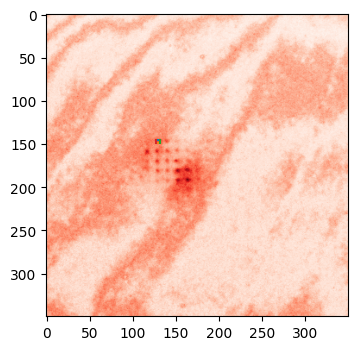

In [95]:
plt.figure(dpi=100)
itr = 0 # the iteration index
shot = 1
if iters > 1:
    norm = img[itr,:,shot,:,:].mean(0)
else:
    norm = img[:,shot,:,:].mean(0)

print(np.amax(norm),np.amin(norm))
plt.imshow(norm,cmap='Reds'),#vmin=4e3)#,vmax=0.24)

# roi 0
top = 189
left = 163
bottom = 193
right = 167

# roi 1
top = 168
left = 139
bottom = 172
right = 143

# roi 2
top = 145
left = 127
bottom = 149
right = 131

plt.plot([right,left],[top,top])
plt.plot([right,left],[bottom,bottom])
plt.plot([right,right],[bottom,top])
plt.plot([left,left],[bottom,top])

plt.show()

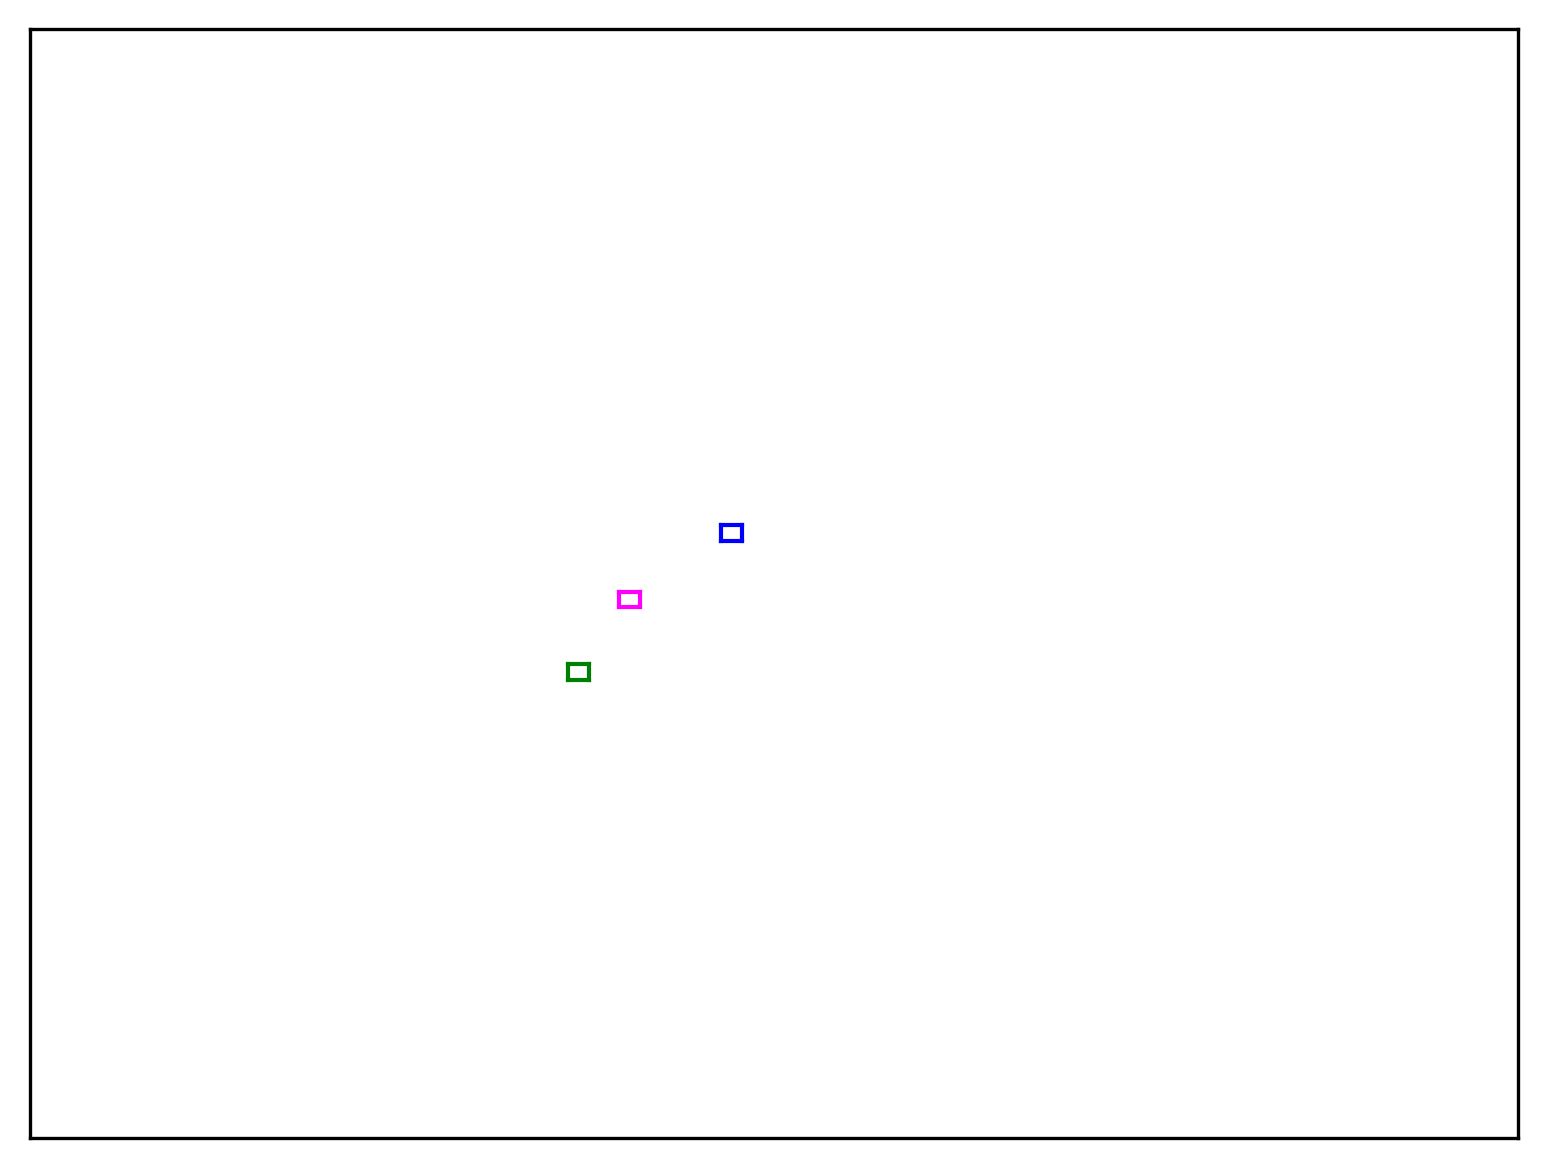

In [49]:
lw = 1

fig,ax = plt.subplots(dpi=300)
# ax.imshow(np.zeros((350,350)),cmap='Greys')

# roi 0
roi0 = 'blue'
top = 189 - 0.5
left = 163 - 0.5
bottom = 193 + 0.5
right = 167 + 0.5
ax.plot([right,left],[top,top],color=roi0,lw=lw)
ax.plot([right,left],[bottom,bottom],color=roi0,lw=lw)
ax.plot([right,right],[bottom,top],color=roi0,lw=lw)
ax.plot([left,left],[bottom,top],color=roi0,lw=lw)

# roi 1
roi1 = 'magenta'
top = 168 - 0.5
left = 139 - 0.5
bottom = 172 + 0.5
right = 143 + 0.5
ax.plot([right,left],[top,top],color=roi1,lw=lw)
ax.plot([right,left],[bottom,bottom],color=roi1,lw=lw)
ax.plot([right,right],[bottom,top],color=roi1,lw=lw)
ax.plot([left,left],[bottom,top],color=roi1,lw=lw)

# roi 2
roi2 = 'green'
top = 145 - 0.5
left = 127 - 0.5
bottom = 149 + 0.5
right = 131 + 0.5
ax.plot([right,left],[top,top],color=roi2,lw=lw)
ax.plot([right,left],[bottom,bottom],color=roi2,lw=lw)
ax.plot([right,right],[bottom,top],color=roi2,lw=lw)
ax.plot([left,left],[bottom,top],color=roi2,lw=lw)

# ax.set_axis_off()
ax.set_xlim((0,350))
ax.set_ylim((0,350))
ax.set_xticks([])
ax.set_yticks([])
cwd = os.getcwd()
plt.savefig(os.path.join(cwd,'coherent_trap_rois_bordered.svg'),bbox_inches='tight',transparent=True)
plt.show()


In [27]:
cwd

'C:\\Users\\prest\\Documents\\Python\\rubidium\\lab_analysis'

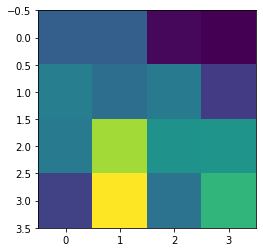

In [96]:
plt.imshow(norm[top:bottom,left:right])

In [88]:
img.shape

(14, 301, 2, 350, 350)

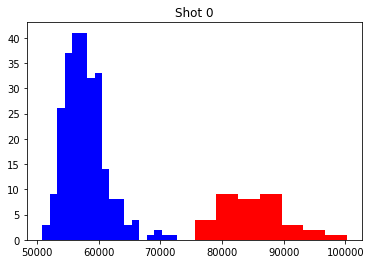

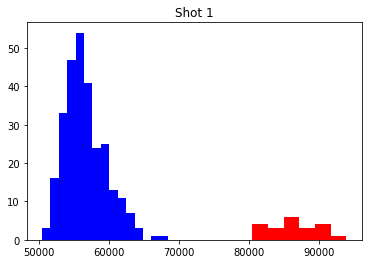

In [99]:
# histogram

shots = [0,1]
# cutoffs = [None,None]
cutoffs = [80000,80000] # roi 0
cutoffs = [70000,70000] # roi 1
cutoffs = [75000,78000] # roi 2

bins = 'auto' #linspace(50000,65000,30) # 

atom_cts = []
for shot,cutoff in zip(shots,cutoffs):
    fig,ax = plt.subplots()
    if iters > 1:
        subimg = img[itr,:,shot,:,:]
        roi_stack = subimg[:,top:bottom,left:right]
    else:
        subimg = img[:,shot,:,:]
        roi_stack = subimg[:,top:bottom,left:right]
    counts = np.array([np.sum(frame) for frame in roi_stack])
    counts = [x for x in counts if x > 0] # usually counts = 0 is not real

    if cutoff != None:
        no_atom = [x for x in counts if x < cutoff]
        atom = [x for x in counts if x >= cutoff]

        atom_cts.append(len(atom))
        ax.hist(no_atom, bins=bins,color='blue')
        ax.hist(atom, bins=bins,color='red')
        ax.set_title(f"Shot {shot}")
    else:
        ax.hist(counts,bins=bins,color='green')
        ax.set_title(f"Shot {shot}")
    plt.show()
    #     ax.set_xlim((2,35))
# print(f"retention = {atom_cts[0]/atom_cts[1]}")

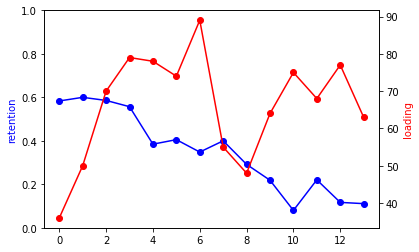

In [100]:
# compute retention vs iteration in the method of CsPy

ii = 1 # drop first measurement, in which no shots are taken
xpts = range(iters)
# cutoffs = [56000,44000]

retention = zeros(iters)
loading = zeros(iters)
for i in range(iters):
    atom_cts = []
    for shot,cutoff,in zip(shots,cutoffs):
        if iters > 1:
            roi_stack = img[i,ii:,shot,top:bottom,left:right]
        else:
            roi_stack = img[ii:,shot,top:bottom,left:right]
        counts = np.array([np.sum(frame) for frame in roi_stack])
        
        atom = array([1 if x >= cutoff else 0 for x in counts])
        atom_cts.append(atom)
        
    truth = np.logical_and(atom_cts[0],atom_cts[1])
    loaded = len([x for x in atom_cts[0] if x==1])
    loading[i] = loaded
    if loaded > 0:
        retention[i] = len([1 for x in truth if x==True])/loaded
    
fig,ax = plt.subplots()
ax1 = ax.twinx()
ax.scatter(xpts,retention,c='b')
ax.plot(xpts,retention,c='b')
ax.set_ylim((0,1))
ax1.plot(xpts,loading,c='r',)
ax1.scatter(xpts,loading,c='r',)
ax.set_ylabel('retention',color='b')
ax1.set_ylabel('loading',color='r')
plt.show()
# ax.set_xticks(linspace(0,100,11));

In [ ]:
l

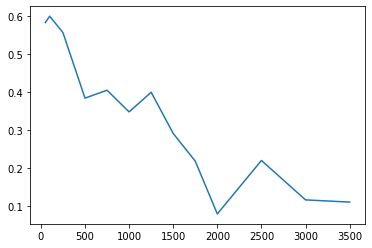

In [101]:
plt.plot(times1,retention)

In [82]:
times1 = [50,100,150,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500]
times2 = [4000,5000,6000]

In [102]:
# fname = 'lifetime_roi0_coh_50_to_3500ms_20220131.csv'
# fname = 'lifetime_roi1_coh_50_to_3500ms_20220131.csv'
fname = 'lifetime_roi2_coh_50_to_3500ms_20220131.csv'

# fname = 'lifetime_roi0_coh_2000_to_4000ms_20220131.csv'
# fname = 'lifetime_roi1_coh_2000_to_4000ms_20220131.csv'
# fname = 'lifetime_roi2_coh_2000_to_4000ms_20220131.csv'

labels=['t hold time [ms]','retention','loading']
data = [times1,retention,loading]
soln_to_csv(fname, data, labels)

wrote data to lifetime_roi2_coh_50_to_3500ms_20220131.csv


In [196]:
# fname = 'highfreqs_roi0_coh_20220129.csv'
# fname = 'highfreqs_roi1_coh_20220129.csv'
# fname = 'highfreqs_roi2_coh_20220129.csv'

# fname = 'midfreqs_roi0_coh_20220129.csv'
# fname = 'midfreqs_roi1_coh_20220129.csv'
# fname = 'midfreqs_roi2_coh_20220129.csv'

# fname = 'lowfreqs_roi0_coh_20220129.csv'
# fname = 'lowfreqs_roi1_coh_20220129.csv'
# fname = 'lowfreqs_roi2_coh_20220129.csv'
labels=['frequency [kHz]','retention','loading']
data = [lowfreqs,retention,loading]
soln_to_csv(fname, data, labels)

wrote data to lowfreqs_roi2_coh_20220129.csv


## plotting saved csvs

### lifetimes

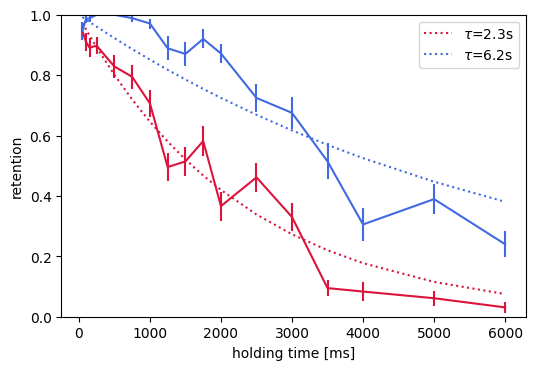

In [15]:
site0 = ['lifetime_roi0_coh_50_to_3500ms_20220131.csv','lifetime_roi0_coh_2000_to_4000ms_20220131.csv']
site1 = ['lifetime_roi1_coh_50_to_3500ms_20220131.csv','lifetime_roi1_coh_2000_to_4000ms_20220131.csv']
site2 = ['lifetime_roi2_coh_50_to_3500ms_20220131.csv','lifetime_roi2_coh_2000_to_4000ms_20220131.csv']

error = True
fit = True

colors = ['crimson','royalblue','forestgreen']
sites = [site0,site1] #,site2]

def model(t,a,tau):
    return a*exp(-t/tau)

fig,ax = plt.subplots(dpi=100)

for i,site,color in zip(range(len(sites)),sites,colors):
    
    rpts = []
    tpts = []
    lpts = []
    
    for f in site:
        data, labels = soln_from_csv(os.path.join(datadir,f))
        fff,rrr,lll = data
        rpts += list(rrr)
        tpts += list(fff)
        lpts += list(lll)

    rrr = real(array(rpts))
    fff = real(array(tpts))
    lll = real(array(lpts))

    rrr_err=real(np.sqrt(rrr-rrr**2)/np.sqrt(lll))
    if error:
        ax.errorbar(fff,rrr,yerr=rrr_err,color=color)#,label=f'site={i}')
    else:
        ax.scatter(fff,rrr,color=color)
        
    if fit:
        popt, pcov = curve_fit(model,fff,rrr,bounds=([0.4,1000],[1,8000]))
        a,tau = popt
        ax.plot(fff,model(fff,a,tau),label=r'$\tau$'+f'={tau/1e3:.2}s',color=color,linestyle=':')

ax.legend()
ax.set_ylim((0,1))
ax.set_ylabel("retention")
ax.set_xlabel("holding time [ms]")
# plt.savefig(os.path.join(datadir, 'coherent_trap_lifetime.pdf'))
plt.show()

### trap frequencies

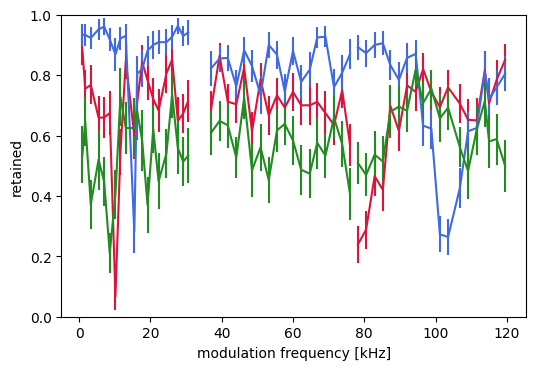

In [11]:
files = ['highfreqs_roi0_coh_20220129.csv','highfreqs_roi1_coh_20220129.csv','highfreqs_roi2_coh_20220129.csv',
         'midfreqs_roi0_coh_20220129.csv','midfreqs_roi1_coh_20220129.csv','midfreqs_roi2_coh_20220129.csv',
         'lowfreqs_roi0_coh_20220129.csv','lowfreqs_roi1_coh_20220129.csv','lowfreqs_roi2_coh_20220129.csv']
error = True
colors = 3*['crimson','royalblue','forestgreen']

fig,ax = plt.subplots(dpi=100)

for f,color in zip(files,colors):
    data, labels = soln_from_csv(os.path.join(datadir,f))
    fff,rrr,lll = data
    rrr_err=real(np.sqrt(rrr-rrr**2)/np.sqrt(lll))
    if error:
        ax.errorbar(real(fff),real(rrr),yerr=rrr_err,color=color)
    else:
        ax.plot(real(fff),real(rrr),yerr=rrr_err,color=color)
    
ax.set_ylim((0,1))
ax.set_ylabel("retained")
ax.set_xlabel("modulation frequency [kHz]")
plt.show()

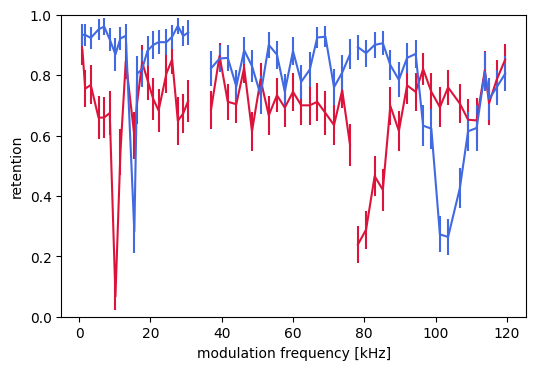

In [16]:
site0 = ['highfreqs_roi0_coh_20220129.csv','midfreqs_roi0_coh_20220129.csv','lowfreqs_roi0_coh_20220129.csv']
site1 = ['highfreqs_roi1_coh_20220129.csv','midfreqs_roi1_coh_20220129.csv','lowfreqs_roi1_coh_20220129.csv']
site2 = ['highfreqs_roi2_coh_20220129.csv','midfreqs_roi2_coh_20220129.csv','lowfreqs_roi2_coh_20220129.csv']

colors = ['crimson','royalblue','forestgreen']
sites = [site0,site1]#,site2]

fig,ax = plt.subplots(dpi=100)

for i,site,color in zip(range(len(sites)),sites,colors):
    
    for f in site:
        data, labels = soln_from_csv(os.path.join(datadir,f))
        fff,rrr,lll = data
        rrr_err=real(np.sqrt(rrr-rrr**2)/np.sqrt(lll))
        if error:
            ax.errorbar(real(fff),real(rrr),yerr=rrr_err,color=color)#,label=f'site={i}')
        else:
            ax.plot(real(fff),real(rrr),yerr=rrr_err,color=color)
# ax.legend()
ax.set_ylim((0,1))
ax.set_ylabel("retention")
ax.set_xlabel("modulation frequency [kHz]")
# plt.savefig(os.path.join(datadir, 'coherent_trap_resonances.pdf'))
plt.show()

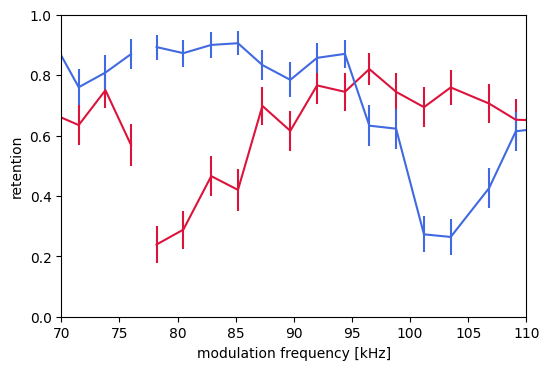

In [209]:
fig,ax = plt.subplots(dpi=100)

for i,site,color in zip(range(len(sites)),sites,colors):
    
    for f in site:
        data, labels = soln_from_csv(f)
        fff,rrr,lll = data
        rrr_err=real(np.sqrt(rrr-rrr**2)/np.sqrt(lll))
        if error:
            ax.errorbar(real(fff),real(rrr),yerr=rrr_err,color=color)#,label=f'site={i}')
        else:
            ax.plot(real(fff),real(rrr),yerr=rrr_err,color=color)
# ax.legend()
ax.set_ylim((0,1))
ax.set_xlim((70,110))
ax.set_ylabel("retention")
ax.set_xlabel("modulation frequency [kHz]")
plt.show()

In [162]:
lowfreqs = [0.937,1.718,3.28,5.46,7.03,8.6,10.2,11.6,13.1,15.5,16.3,17.7,19.2,20.8,22.3,24.5,26.1,27.7,29.2,30.6] # f0 = 60 kHz, fdev = 30 kHz. voltage in CsPy notes
midfreqs = [37,39.4,41.7,44.1,46.3,48.5,50.9,53.2,55.5,57.7,60,62.3,64.7,66.8,69.1,71.5,73.8,76] # f0 = 60 kHz, fdev = 30 kHz. voltage in CsPy notes
highfreqs = [78.2,80.5,82.9,85.2,87.3,89.7,92,94.4,96.5,98.8,101.2,103.5,106.8,109.1,111.5,
             113.8,115,117.1,119.5] # f0 = 60 kHz, fdev = 30 kHz. voltage in CsPy notes